importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

constants

In [2]:
nz = 256    #nzgrid
depth = np.pi   #Lz
z2 = np.pi/10    #hight in z direction above Lref=0
z1 = z2 - depth #depth in z direction below Lref=0
# g = 1.0 #acceleration due to gravity
g = 1.0 #acceleration due to gravity
gamma = 5/3
w = 0.04    #parameter to control the sharpness of discontinuity
cs2max = 10.0    #cs^2 in the upper layer
csbase = 1.0    # NOTE:

In [3]:
z = np.linspace(z1,z2,nz)   #grid
zz = np.zeros(np.size(z))   #array to save the integral values

temperature dependence of $c_s^2$

In [4]:
cs2 = csbase + 0.5*(1+np.tanh(z/w))*(cs2max-1)

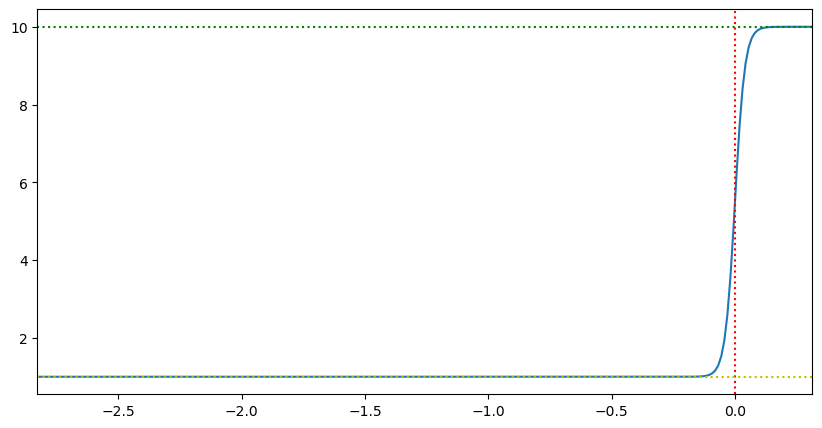

In [5]:
plt.figure(figsize=(10,5))
plt.plot(z, cs2)
plt.xlim(z[0], z[-1])
plt.axvline(x=0, ls=':', c='r')
plt.axhline(y=cs2max, ls=':', c='g')
plt.axhline(y=csbase, ls=':', c='y')
plt.show()

$$ln(\frac{\rho}{\rho_0})=\gamma\int_{z_{ref}}^{z}\frac{g}{c_s^2}dz$$

In terms of our grid, the formula translates to

$$ln(\frac{\rho}{\rho_0})[i]=\gamma\int_{z[0]}^{z[i]}\frac{g}{c_s^2}dz$$

which gives the value of $ln\rho$ at the grid point $z[i]$

the integrand

In [6]:
f = g/cs2

In [7]:
dz = z[1] - z[0]

value of $\int_{z[0]}^{z[i]}\frac{g}{c_s^2}dz$ for all grid points are

In [8]:
for i in range(1, len(z)):
    # print(i)
    zz[i] = zz[i-1]+0.5*(f[i]+f[i-1])
zz = zz*dz  #value

value of $ln\rho$ and *entropy* at different grid points

In [9]:
lncs2 = np.log(cs2) #value to scale # NOTE: is it choosen arbitarily
lnrho = -gamma*(zz-depth)-lncs2 #log of \rho
ss = (gamma-1)*zz+lncs2 #entropy

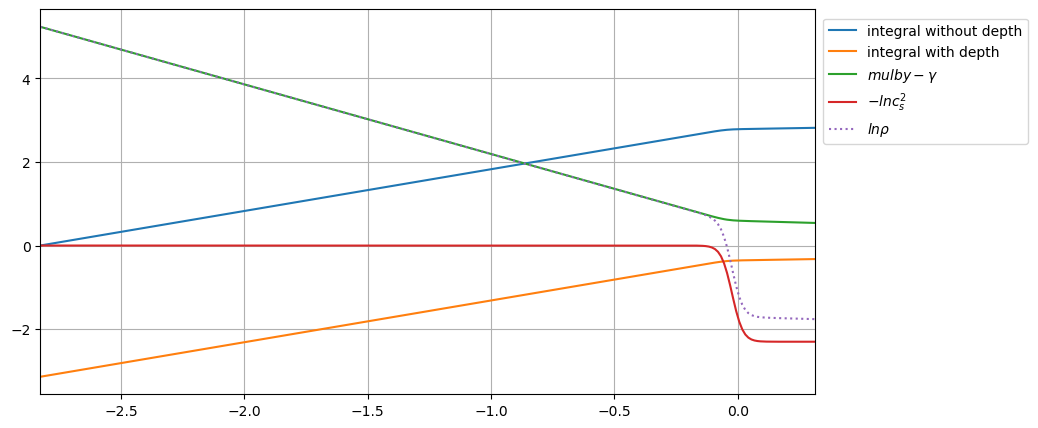

In [10]:
plt.figure(figsize=(10,5))
plt.plot(z, zz, label='integral without depth')
plt.plot(z, zz-depth, label='integral with depth')
plt.plot(z, -gamma*(zz-depth), label=r'$mul by -\gamma$')
plt.plot(z, -lncs2, label=r'$-lnc_s^2$')
plt.plot(z, lnrho, ls=':', label=r'$ln\rho$')
plt.xlim(z[0], z[-1])
plt.grid()
plt.legend(loc=(1.01,.65))
plt.show()

In [11]:
z[0], z[-1]

(-2.827433388230814, 0.3141592653589793)

saving the file

In [12]:
arr = np.empty([nz,3], dtype=float)
arr[:,0] = z
arr[:,1] = lnrho
arr[:,2] = ss

In [13]:
fmt = '%1.6f', '%1.6f', '%1.6f'

In [14]:
np.savetxt('stratification.dat', arr, delimiter=' ', fmt=fmt)